In [1]:
#Create by Weirong Dong
#Considering all the parameters(GPA,GRE,Tofel,Ranking,RL,SOP,Research)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

# Load data
admission_data = np.genfromtxt('Admission_Predict_Ver1.1.csv', delimiter=',', skip_header=1)
# Convert to PyTorch tensors
X = torch.from_numpy(admission_data[:, 1:-1]).float()
y = torch.from_numpy(admission_data[:, -1]).float()

# Split into train and test sets
X_train, y_train = X[:400], y[:400]
X_test, y_test = X[400:], y[400:]

In [2]:
class ANN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 50)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(50, 250)
        self.relu2 = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)
        self.fc3 = nn.Linear(250, 250)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(250, 50)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(50, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.dropout(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.dropout(out)
        out = self.fc4(out)
        out = self.relu4(out)
        out = self.fc5(out)
        return out
 
def adjust_learning_rate(optimizer, epoch):
    adjust_list = [300]
    if epoch in adjust_list:
        for param_group in optimizer.param_groups:
            param_group['lr'] = param_group['lr'] * 0.1     
 
input_dim = 7
output_dim = 1
learning_rate = 0.04
epochs = 400
batch_size = 400


train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

model = ANN(input_dim, output_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_loss = []
for epoch in range(epochs):
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        output = model(batch_X)
        loss = criterion(output, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        adjust_learning_rate(optimizer, epoch)
    train_loss.append(epoch_loss)
    if (epoch % 50 == 0):
        print('Epoch {}, Loss: {:.4f}'.format(epoch+1, epoch_loss))

y_ann_pred = model(X_test)
test_loss = criterion(y_ann_pred, y_test)

print('Test Loss: {:.4f}'.format(test_loss.item()))

/opt/conda/lib/python3.9/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([400])) that is different to the input size (torch.Size([400, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1, Loss: 15.1120
Epoch 51, Loss: 0.1405
Epoch 101, Loss: 0.0536
Epoch 151, Loss: 0.0210
Epoch 201, Loss: 0.0203
Epoch 251, Loss: 0.0284
Epoch 301, Loss: 0.0203
Epoch 351, Loss: 0.0208
Test Loss: 0.0183


/opt/conda/lib/python3.9/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


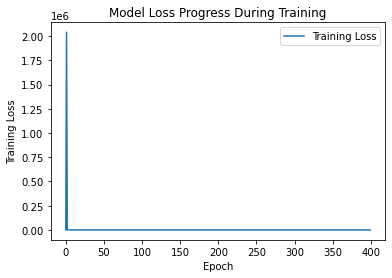

In [5]:
#Plot the training loss over time
plt.plot(range(epochs), train_loss)
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])